# Water Simulation Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md
import MDAnalysis as mda

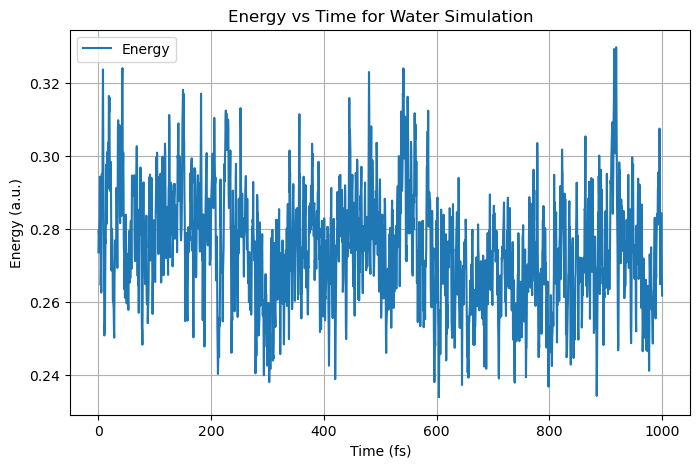

In [2]:
# File paths for the water simulation
energy_file = "runs_water/water_aimd_1ns_every0.5fs-1.ener"
trajectory_file = "runs_water/water_aimd_1ns_every0.5fs-pos-1.xyz"
box_size = 12.42  # Box size from your input file in angstroms

# 1. Plot energy vs. time
# Load energy data from the energy file
energy_data = np.loadtxt(energy_file, skiprows=1)  # Skip header line
time = energy_data[:, 1]  # Assuming time is in the second column
energy = energy_data[:, 2]  # Assuming energy is in the third column

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(time, energy, label='Energy')
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.title('Energy vs Time for Water Simulation')
plt.legend()
plt.grid(True)
plt.show()



Number of oxygen atoms: 64


/home/hh2635/.local/lib/python3.11/site-packages/MDAnalysis/analysis/base.py:447: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/hh2635/.local/lib/python3.11/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/hh2635/.local/lib/python3.11/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)


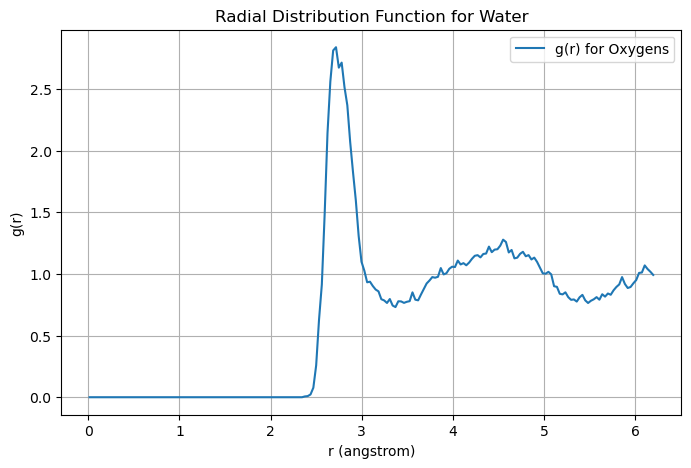

In [3]:
from MDAnalysis.analysis.rdf import InterRDF
from MDAnalysis import Universe
import matplotlib.pyplot as plt

# Load the .xyz file
u = Universe("runs_water/water_aimd_1ns_every0.5fs-pos-1.xyz")

# Set the box dimensions manually (from input file)
box_size = 12.42  # Box size in angstroms
u.dimensions = [box_size, box_size, box_size, 90.0, 90.0, 90.0]

# Select oxygen atoms
oxygen = u.select_atoms("name O")
print(f"Number of oxygen atoms: {len(oxygen)}")

# Compute g(r)
rdf = InterRDF(oxygen, oxygen, nbins=200, range=(0.0, box_size / 2))
rdf.run()

# Smooth out short-distance numerical artifacts
rdf.rdf[rdf.bins < 1.0] = 0  # Set g(r) = 0 for r < 1.0 Å

# Plot g(r)
plt.figure(figsize=(8, 5))
plt.plot(rdf.bins, rdf.rdf, label="g(r) for Oxygens")
plt.xlabel("r (angstrom)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Function for Water")
plt.legend()
plt.grid(True)
plt.show()

# Proton AIMD Analysis

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md
import MDAnalysis as mda

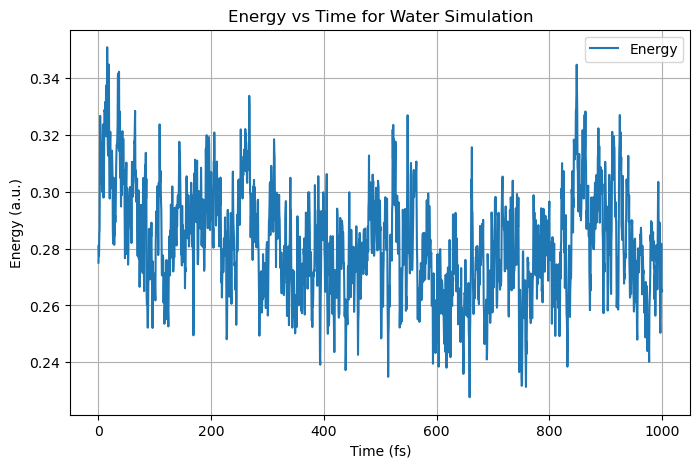

In [5]:
# File paths for the water simulation
energy_file = "runs_proton/proton_aimd_1ns_every0.5fs-1.ener"
trajectory_file = "runs_proton/proton_aimd_1ns_every0.5fs-pos-1.xyz"
box_size = 12.42  # Box size from your input file in angstroms

# 1. Plot energy vs. time
# Load energy data from the energy file
energy_data = np.loadtxt(energy_file, skiprows=1)  # Skip header line
time = energy_data[:, 1]  # Assuming time is in the second column
energy = energy_data[:, 2]  # Assuming energy is in the third column

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(time, energy, label='Energy')
plt.xlabel('Time (fs)')
plt.ylabel('Energy (a.u.)')
plt.title('Energy vs Time for Water Simulation')
plt.legend()
plt.grid(True)
plt.show()



Number of oxygen atoms: 64


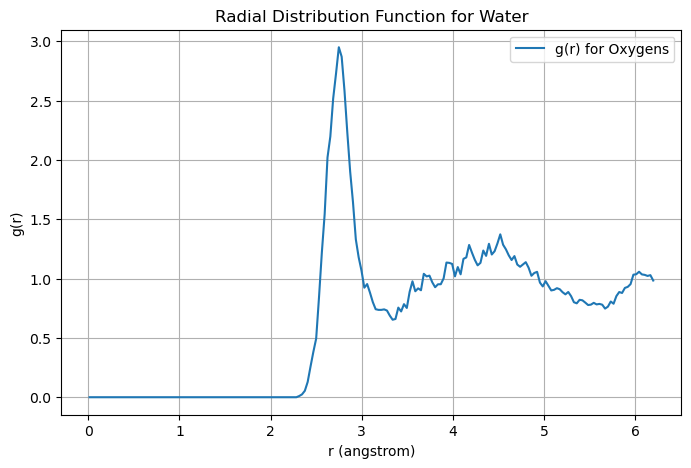

In [6]:
from MDAnalysis.analysis.rdf import InterRDF
from MDAnalysis import Universe
import matplotlib.pyplot as plt

# Load the .xyz file
u = Universe("runs_proton/proton_aimd_1ns_every0.5fs-pos-1.xyz")

# Set the box dimensions manually (from input file)
box_size = 12.42  # Box size in angstroms
u.dimensions = [box_size, box_size, box_size, 90.0, 90.0, 90.0]

# Select oxygen atoms
oxygen = u.select_atoms("name O")
print(f"Number of oxygen atoms: {len(oxygen)}")

# Compute g(r)
rdf = InterRDF(oxygen, oxygen, nbins=200, range=(0.0, box_size / 2))
rdf.run()

# Smooth out short-distance numerical artifacts
rdf.rdf[rdf.bins < 1.0] = 0  # Set g(r) = 0 for r < 1.0 Å

# Plot g(r)
plt.figure(figsize=(8, 5))
plt.plot(rdf.bins, rdf.rdf, label="g(r) for Oxygens")
plt.xlabel("r (angstrom)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Function for Water")
plt.legend()
plt.grid(True)
plt.show()